# Kaggle One week of Betfair data: 23 sports

A sample of Betfair data available on Kaggle(https://www.kaggle.com/datasets/zygmunt/betfair-sports). All sports except horse racing (for horse racing, there is a twin dataset at https://www.kaggle.com/zygmunt/betfair-horses).


The file has 1306731 data rows. It is 321 MB uncompressed.
Sports IDs:

1 - Soccer
2 - Tennis
3 - Golf
4 - Cricket
5 - Rugby Union
6 - Boxing
8 - Motor Sport
10 - Special Bets
11 - Cycling
1477 - Rugby League
3503 - Darts
3988 - Athletics
4339 - Greyhound Racing
6231 - Financial Bets
6422 - Snooker
6423 - American Football
7511 - Baseball
7522 - Basketball
7524 - Ice Hockey
61420 - Australian Rules
104049 - ? [1 row]
468328 - Handball
998917 - Volleyball
2152880 - Gaelic Games
26420387 - UFC

In [24]:
# do the usaul imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# set the theme to seaborn
sns.set()

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [22]:
# load the dataframe
betfair_df = pd.read_csv("resources/betfair_dataset.csv")

# change sports id to the sports name
sports_names = {1: "Soccer", 2: "Tennis", 3: "Golf", 4: "Cricket", 5: "Rugby", 6: "Boxing", 
                8: "Motor Sport", 10: "Special Bets", 11: "Cycling", 1477: "Rugby",
                3503: "Darts", 3988: "Athletics", 4339: "Greyhound Racing", 6231: "Financial Bets",
                6422: "Billards", 6423: "American Football", 7511: "Baseball", 7522: "Basketball",
                7524: "Hockey", 61420: "Australian Football", 104049: "Unknown", 468328: "Handball",
                998917: "Volleyball", 2152880: "Gaelic Games", 26420387: "UFC"}

betfair_df["SPORTS_ID"] = betfair_df["SPORTS_ID"].map(sports_names)

# change sports id and event id to objects
betfair_df["EVENT_ID"] = betfair_df["EVENT_ID"].astype(object)

# remove all rows where game/event did not go into play i.e canceled for some reason
betfair_df = betfair_df.loc[betfair_df.IN_PLAY != "NI"]

# calculate the total winnings
betfair_df["WIN_AMOUNT"] = betfair_df["ODDS"] * betfair_df["VOLUME_MATCHED"] * betfair_df["WIN_FLAG"]

# calculate the loss amount
# https://betting.betfair.com/how-to-use-betfair-exchange/beginner-guides/placing-a-lay-bet-010819-51.html
#betfair_df["LOSS_AMOUNT"] = (betfair_df["ODDS"] * betfair_df["VOLUME_MATCHED"] - betfair_df["VOLUME_MATCHED"]) * (1 - betfair_df["WIN_FLAG"])
betfair_df["LOSS_AMOUNT"] = (betfair_df["ODDS"] * betfair_df["VOLUME_MATCHED"]) * (1 - betfair_df["WIN_FLAG"])
betfair_df.info()

betfair_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 1061101 entries, 0 to 1306745
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   SPORTS_ID         1061101 non-null  object 
 1   EVENT_ID          1061101 non-null  object 
 2   SETTLED_DATE      1043349 non-null  object 
 3   FULL_DESCRIPTION  1060592 non-null  object 
 4   SCHEDULED_OFF     1061101 non-null  object 
 5   EVENT             1043349 non-null  object 
 6   DT ACTUAL_OFF     1061101 non-null  object 
 7   SELECTION_ID      1061101 non-null  int64  
 8   SELECTION         1061101 non-null  object 
 9   ODDS              1061101 non-null  float64
 10  NUMBER_BETS       1061101 non-null  int64  
 11  VOLUME_MATCHED    1061101 non-null  float64
 12  LATEST_TAKEN      1061101 non-null  object 
 13  FIRST_TAKEN       1061101 non-null  object 
 14  WIN_FLAG          1061101 non-null  int64  
 15  IN_PLAY           1061101 non-null  object 
 16  WIN_A

,SPORTS_ID,EVENT_ID,SETTLED_DATE,FULL_DESCRIPTION,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,NUMBER_BETS,VOLUME_MATCHED,LATEST_TAKEN,FIRST_TAKEN,WIN_FLAG,IN_PLAY,WIN_AMOUNT,LOSS_AMOUNT
0,Soccer,115279736,04-09-2014 17:07:30,U21 Euro Championship/Qualifiers/Fixtures 04 S...,04-09-2014 15:30,Over/Under 1.5 Goals,04-09-2014 15:32:39,1221386,Over 1.5 Goals,1.35,7,765.54,04-09-2014 16:39:49,04-09-2014 16:39:28,1,IP,1033.4790,0.000
1,Tennis,115288925,04-09-2014 11:50:25,Group A/Brasov Challenger 2014/Second Round Ma...,04-09-2014 10:30,Match Odds,04-09-2014 10:34:32,7659748,Aslan Karatsev,1.12,41,3836.70,04-09-2014 11:44:26,04-09-2014 11:18:57,1,IP,4297.1040,0.000
2,Soccer,115196118,03-09-2014 15:08:55,U21 Euro Championship/Qualifiers/Fixtures 03 S...,03-09-2014 14:00,Over/Under 1.5 Goals,03-09-2014 14:00:45,1221386,Over 1.5 Goals,2.10,6,625.54,03-09-2014 15:00:37,03-09-2014 14:45:28,1,IP,1313.6340,0.000
4,Soccer,115236324,01-09-2014 19:46:39,Irish Soccer/FAI Ford Cup/Fixtures 01 Septembe...,01-09-2014 19:00,Over/Under 0.5 Goals,01-09-2014 19:01:34,5851483,Over 0.5 Goals,1.10,22,1176.46,01-09-2014 19:26:21,01-09-2014 19:20:00,1,IP,1294.1060,0.000
5,Soccer,115184779,02-09-2014 18:38:14,Swedish Soccer/Superettan/Fixtures 02 Septembe...,02-09-2014 17:20,Over/Under 1.5 Goals,02-09-2014 17:20:13,1221386,Over 1.5 Goals,1.34,19,903.18,02-09-2014 18:30:48,02-09-2014 18:28:48,1,IP,1210.2612,0.000
6,Cricket,115245248,NaN,Group C/English Domestic/Royal London One Day ...,04-09-2014 13:00,NaN,04-09-2014 12:59:50,266620,300 Runs or more,4.60,2,47.06,04-09-2014 13:51:12,04-09-2014 13:51:12,0,IP,0.0000,216.476
7,Soccer,115279787,04-09-2014 16:06:00,U21 Euro Championship/Qualifiers/Fixtures 04 S...,04-09-2014 14:15,Over/Under 7.5 Goals,04-09-2014 14:15:00,1485573,Over 7.5 Goals,1.65,2,7.32,04-09-2014 15:25:40,04-09-2014 15:25:40,0,IP,0.0000,12.078
8,Tennis,115280497,05-09-2014 19:52:26,Group A/US Open 2014/Womens Tournament/Semi Fi...,05-09-2014 17:45,Game 06,05-09-2014 18:11:10,2309522,Caroline Wozniacki,1.37,3,110.00,05-09-2014 19:47:07,05-09-2014 19:46:50,1,IP,150.7000,0.000
9,Soccer,115279703,04-09-2014 02:55:01,Brazilian Soccer/Brazilian Cup/Fixtures 04 Sep...,04-09-2014 01:00,Over/Under 6.5 Goals,04-09-2014 00:59:48,2542448,Under 6.5 Goals,1.08,11,304.52,04-09-2014 02:11:01,04-09-2014 01:54:07,1,IP,328.8816,0.000
10,Soccer,115137087,01-09-2014 20:21:08,French Soccer/Ligue 2 Orange/Fixtures 01 Septe...,01-09-2014 18:30,Over/Under 2.5 Goals,01-09-2014 18:30:04,47972,Under 2.5 Goals,1.28,41,2053.18,01-09-2014 20:12:20,01-09-2014 18:58:13,1,IP,2628.0704,0.000


In [15]:
# add calculate the winnings
betfair_df["WIN_AMOUNT"] = betfair_df["ODDS"] * betfair_df["VOLUME_MATCHED"] * betfair_df["WIN_FLAG"]

In [9]:
betfair_df["SPORTS_ID"].value_counts()

SPORTS_ID
Soccer                 840149
Tennis                 115828
Basketball              24481
Golf                    21282
Cricket                 14235
Rugby                    9777
American Football        7479
Motor Sport              5887
Baseball                 5325
Volleyball               4903
Cycling                  3799
Hockey                   2427
Australian Football      2203
Billards                 1109
UFC                       534
Special Bets              486
Greyhound Racing          402
Gaelic Games              374
Boxing                    319
Handball                  101
Unknown                     1
Name: count, dtype: int64

Number of Bets:  8244160
Total Money Wagered: 824059327.22
Total Money Won:  829141033.03
Total Money Loss:  865806619.89
Money Difference:  -36665586.86


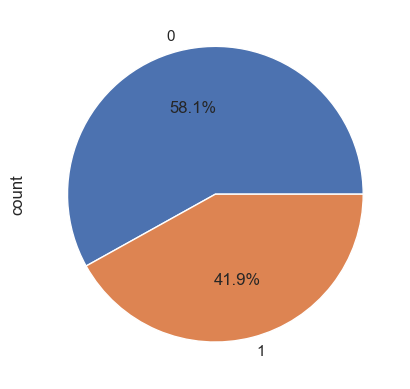

In [23]:
# lets get the number of best and monel total
num_of_bets = betfair_df["NUMBER_BETS"].sum()
money_wagered = betfair_df["VOLUME_MATCHED"].sum()
money_won = betfair_df["WIN_AMOUNT"].sum()
money_loss = betfair_df["LOSS_AMOUNT"].sum()

print("Number of Bets: ", num_of_bets)
print("Total Money Wagered:", round(money_wagered, 2))
print("Total Money Won: ", round(money_won, 2))
print("Total Money Loss: ", round(money_loss, 2))
print("Money Difference: ", round(money_won - money_loss, 2))

# lets see the winning and lossing bets
betfair_df["WIN_FLAG"].value_counts().plot.pie(autopct='%1.1f%%');

<Axes: xlabel='WIN_FLAG'>

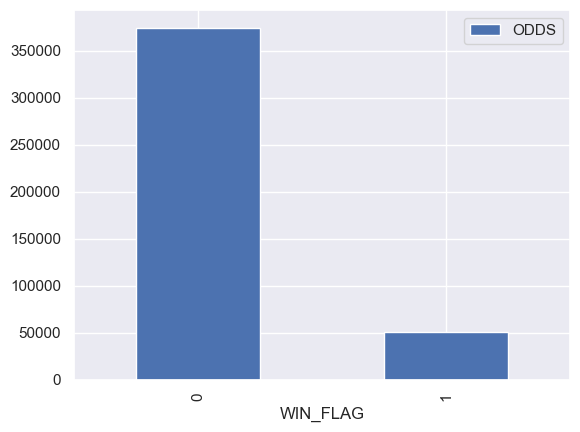

In [21]:
underdogs =  betfair_df.loc[betfair_df["ODDS"] > 3.3, ["ODDS", "WIN_FLAG"]]
underdogs.groupby("WIN_FLAG").count().plot.bar()

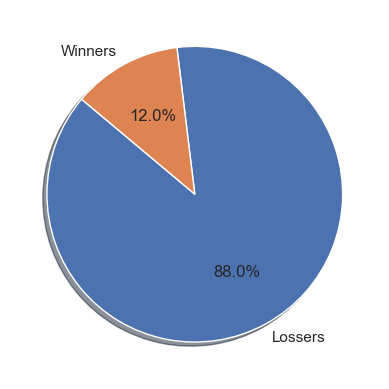

In [23]:
plt.pie([374542, 50865], labels=["Lossers", "Winners"],
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

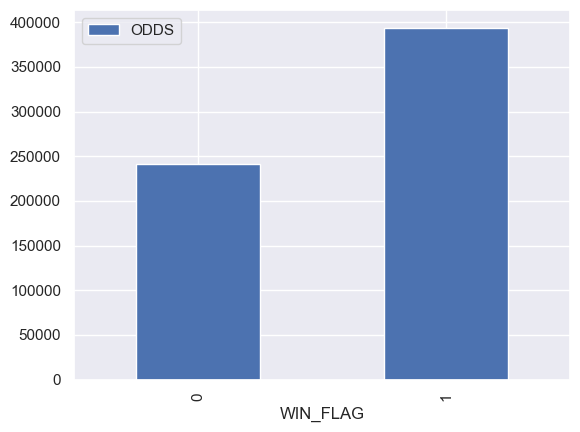

In [16]:
underdogs =  betfair_df.loc[betfair_df["ODDS"] <= 3.3, ["ODDS", "WIN_FLAG"]]
underdogs.groupby("WIN_FLAG").count().plot.bar();

In [13]:
# lets export a sample dataset of 10000 entires so we can quickly work with it
weights = betfair_df['SPORTS_ID'].value_counts(normalize=True)
sample_df = betfair_df.sample(n=10000, weights='SPORTS_ID', random_state=1)
sample_df.to_csv("resources/betfair_sample.csv", index=False)

In [5]:
# lets see how many sports/events there are
sports = betfair_df["SPORTS_ID"].value_counts().sort_values(ascending=False)
sports

#sports.plot.bar()

SPORTS_ID
1           840149
2           115828
7522         24481
3            21282
4            14235
6423          7479
8             5887
7511          5325
5             5297
998917        4903
1477          4480
11            3799
7524          2427
61420         2203
6422          1109
26420387       534
10             486
4339           402
2152880        374
6              319
468328         101
104049           1
Name: count, dtype: int64

In [6]:
# extract WNBA/NBA games
nba_df = betfair_df.loc[(betfair_df["SPORTS_ID"] == 7522) & 
                        betfair_df["FULL_DESCRIPTION"].str.contains("NBA")]

games_df = nba_df.groupby("FULL_DESCRIPTION")
games_df.count()

,SPORTS_ID,EVENT_ID,SETTLED_DATE,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,NUMBER_BETS,VOLUME_MATCHED,LATEST_TAKEN,FIRST_TAKEN,WIN_FLAG,IN_PLAY
FULL_DESCRIPTION,,,,,,,,,,,,,,,
WNBA 2014/Fixtures 01 September/Indiana @ Chicago,412,412,412,412,412,412,412,412,412,412,412,412,412,412,412
WNBA 2014/Fixtures 02 September/Minnesota @ Phoenix,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157
WNBA 2014/Fixtures 03 September/Chicago @ Indiana,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272
WNBA 2014/Games 07 September/Chicago @ Phoenix,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70


In [7]:
# group all soccer games and export to csv
soccer_df = betfair_df.loc[betfair_df["SPORTS_ID"] == 1]

games_df = soccer_df.groupby("FULL_DESCRIPTION")
games_df.count()

# save this se we can explort it further
games_df.count().to_csv("output/soccer_games.csv")

In [8]:
# get mls soccer games
mls_df = betfair_df.loc[(betfair_df["SPORTS_ID"] == 1) & 
                        betfair_df["FULL_DESCRIPTION"].str.contains("MLS")]

games_df = mls_df.groupby("FULL_DESCRIPTION")
games_df.count()

,SPORTS_ID,EVENT_ID,SETTLED_DATE,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,NUMBER_BETS,VOLUME_MATCHED,LATEST_TAKEN,FIRST_TAKEN,WIN_FLAG,IN_PLAY
FULL_DESCRIPTION,,,,,,,,,,,,,,,
North American Soccer/MLS/Fixtures 01 September/Chivas USA v Los Angeles,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739
North American Soccer/MLS/Fixtures 01 September/Chivas USA v Los Angeles/Asian Handicap,24,24,0,24,0,24,24,24,24,24,24,24,24,24,24
North American Soccer/MLS/Fixtures 01 September/Chivas USA v Los Angeles/Chivas USA Total Goals,5,5,0,5,0,5,5,5,5,5,5,5,5,5,5
North American Soccer/MLS/Fixtures 01 September/Chivas USA v Los Angeles/Los Angeles Total Goals,8,8,0,8,0,8,8,8,8,8,8,8,8,8,8
North American Soccer/MLS/Fixtures 01 September/Chivas USA v Los Angeles/Total Goals,3,3,0,3,0,3,3,3,3,3,3,3,3,3,3
North American Soccer/MLS/Fixtures 04 September/Chivas USA v Seattle,1740,1740,1740,1740,1740,1740,1740,1740,1740,1740,1740,1740,1740,1740,1740
North American Soccer/MLS/Fixtures 04 September/Chivas USA v Seattle/Asian Handicap,40,40,0,40,0,40,40,40,40,40,40,40,40,40,40
North American Soccer/MLS/Fixtures 04 September/Chivas USA v Seattle/Chivas USA Total Goals,8,8,0,8,0,8,8,8,8,8,8,8,8,8,8
North American Soccer/MLS/Fixtures 04 September/Chivas USA v Seattle/Seattle Total Goals,2,2,0,2,0,2,2,2,2,2,2,2,2,2,2


In [9]:
# get all nfl games
nfl_df = betfair_df.loc[(betfair_df["SPORTS_ID"] == 6423) & 
                        betfair_df["FULL_DESCRIPTION"].str.contains("NFL")]

games_df = nfl_df.groupby("FULL_DESCRIPTION")
games_df.count()

,SPORTS_ID,EVENT_ID,SETTLED_DATE,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,NUMBER_BETS,VOLUME_MATCHED,LATEST_TAKEN,FIRST_TAKEN,WIN_FLAG,IN_PLAY
FULL_DESCRIPTION,,,,,,,,,,,,,,,
NFL Season 2014/15/Week 1/Games 04 September/Green Bay @ Seattle,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028
NFL Season 2014/15/Week 1/Games 07 September/Buffalo @ Chicago,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238
NFL Season 2014/15/Week 1/Games 07 September/Carolina @ Tampa Bay,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528
NFL Season 2014/15/Week 1/Games 07 September/Cincinnati @ Baltimore,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242
NFL Season 2014/15/Week 1/Games 07 September/Cleveland @ Pittsburgh,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222
NFL Season 2014/15/Week 1/Games 07 September/Jacksonville @ Philadelphia,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369
NFL Season 2014/15/Week 1/Games 07 September/Minnesota @ St Louis,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247
NFL Season 2014/15/Week 1/Games 07 September/New England @ Miami,695,695,695,695,695,695,695,695,695,695,695,695,695,695,695
NFL Season 2014/15/Week 1/Games 07 September/New Orleans @ Atlanta,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361


In [10]:
# get all MLB games
mlb_df = betfair_df.loc[(betfair_df["SPORTS_ID"] == 7511) & 
                        betfair_df["FULL_DESCRIPTION"].str.contains("MLB")]

games_df = mlb_df.groupby("FULL_DESCRIPTION")
games_df.count()

,SPORTS_ID,EVENT_ID,SETTLED_DATE,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,NUMBER_BETS,VOLUME_MATCHED,LATEST_TAKEN,FIRST_TAKEN,WIN_FLAG,IN_PLAY
FULL_DESCRIPTION,,,,,,,,,,,,,,,
MLB 2014/Games 01 September/ARI @ SD,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
MLB 2014/Games 01 September/BOS @ TB,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
MLB 2014/Games 01 September/DET @ CLE,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
MLB 2014/Games 01 September/MIL @ CHC,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
MLB 2014/Games 01 September/MIN @ BAL,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MLB 2014/Games 07 September/SD @ COL,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
MLB 2014/Games 07 September/SEA @ TEX,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
MLB 2014/Games 07 September/STL @ MIL,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28


In [11]:
# group all tennis mtches and export to csv
tennis_df = betfair_df.loc[betfair_df["SPORTS_ID"] == 2]

games_df = tennis_df.groupby("FULL_DESCRIPTION")
games_df.count()

# save this se we can explort it further
games_df.count().to_csv("output/tennis_games.csv")

In [12]:
# get all tennis open games
tennis_open_df = betfair_df.loc[(betfair_df["SPORTS_ID"] == 2) & betfair_df["FULL_DESCRIPTION"].str.contains("Open")]

games_df = tennis_open_df.groupby("FULL_DESCRIPTION")
games_df.count()

,SPORTS_ID,EVENT_ID,SETTLED_DATE,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,NUMBER_BETS,VOLUME_MATCHED,LATEST_TAKEN,FIRST_TAKEN,WIN_FLAG,IN_PLAY
FULL_DESCRIPTION,,,,,,,,,,,,,,,
Group A/Hong Kong Open 2014/Qualifying Matches/Aoyama v Eguchi,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
Group A/Hong Kong Open 2014/Qualifying Matches/Ar Rodionova v Eguchi,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
Group A/Hong Kong Open 2014/Qualifying Matches/Ar Rodionova v Yau Ng,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
Group A/Hong Kong Open 2014/Qualifying Matches/Czink v Bychkova,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192
Group A/Hong Kong Open 2014/Qualifying Matches/Gajdosova v Ho Wu,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Group A/US Open 2014/Womens Tournament/Semi Final Matches/Ser Williams v E Makarova/Game Betting/Set 01,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123
Group A/US Open 2014/Womens Tournament/Semi Final Matches/Ser Williams v E Makarova/Game Betting/Set 02,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228
Group A/US Open 2014/Womens Tournament/The Final/Ser Williams v Wozniacki,1384,1384,1384,1384,1384,1384,1384,1384,1384,1384,1384,1384,1384,1384,1384
